Found 750 images belonging to 3 classes.
Found 225 images belonging to 3 classes.
Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 22s 546ms/step - accuracy: 0.3004 - loss: 9.7916 - val_accuracy: 0.3333 - val_loss: 1.0982
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 22s 565ms/step - accuracy: 0.3638 - loss: 1.0898 - val_accuracy: 0.3956 - val_loss: 1.0891
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 21s 562ms/step - accuracy: 0.3699 - loss: 1.1123 - val_accuracy: 0.4222 - val_loss: 1.0947
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 22s 567ms/step - accuracy: 0.4126 - loss: 1.0865 - val_accuracy: 0.3867 - val_loss: 1.0864
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 22s 580ms/step - accuracy: 0.4477 - loss: 1.0661 - val_accuracy: 0.4133 - val_loss: 1.0784
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 22s 581ms/step - accuracy: 0.3998 - loss: 1.0755 - val_accuracy: 0.4489 - val_loss: 1.0393
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 21s 560ms/step - accuracy: 0.4412 - loss: 1.0483 - val_accuracy: 0.5022 - val_loss: 0.9934
Epoch 8/10
38/3

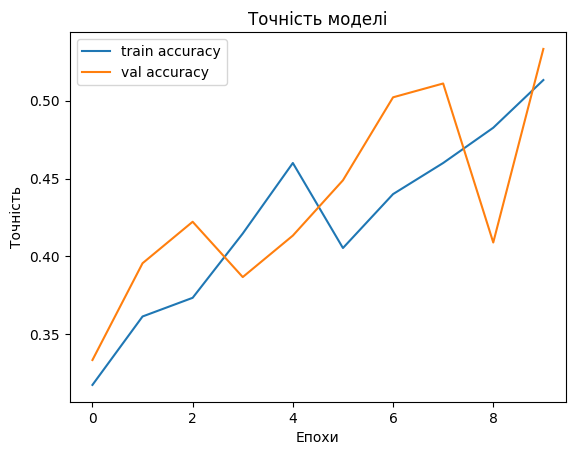

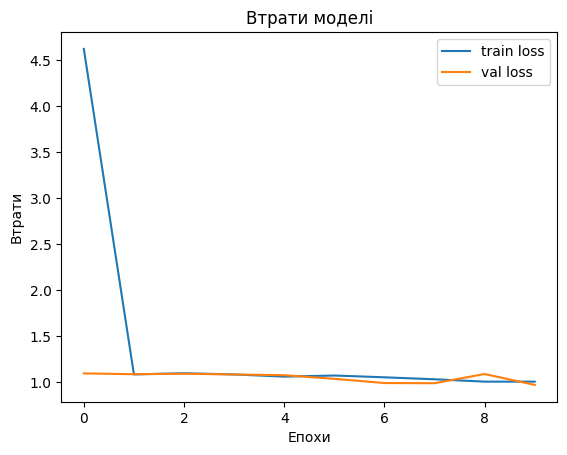

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.4826 - loss: 1.0016
Тестова точність: 53.33%


In [7]:
# Завантаження необхідних бібліотек
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Створення ImageDataGenerator для підготовки даних з аугментацією
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Завантаження тренувальних та тестових даних
train_data = train_datagen.flow_from_directory(
    '101_food_classes_10_percent/train',  # Папка з тренувальними зображеннями
    target_size=(256, 256),
    batch_size=20,
    class_mode='categorical'
)

test_data = test_datagen.flow_from_directory(
    '101_food_classes_10_percent/test',  # Папка з тестовими зображеннями
    target_size=(256, 256),
    batch_size=20,
    class_mode='categorical'
)

# Створення моделі CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # Для класифікації на 3 класи
])

# Компіляція моделі
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Використання ранньої зупинки
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Тренування моделі
history = model.fit(
    train_data,
    epochs=10,
    validation_data=test_data,
    callbacks=[early_stopping]
)

# Візуалізація результатів

# Графік точності
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Точність моделі')
plt.xlabel('Епохи')
plt.ylabel('Точність')
plt.legend()
plt.show()

# Графік втрат
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Втрати моделі')
plt.xlabel('Епохи')
plt.ylabel('Втрати')
plt.legend()
plt.show()

# Оцінка результатів на тестових даних
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Тестова точність: {test_accuracy * 100:.2f}%")